<h1><font color = 'brown' size = '6'>
<b>
Classify Black and White Photos of Clothing
</b>
</font>
</h1>

<h1>
<ul>
<font color = 'brown green' size = '3'>
<b>

<li>
The Fashion-MNIST clothing classification problem is a new standard dataset used in computer vision and deep learning.
</li><br>

<li>
Although the dataset is relatively simple, it can be used as the basis for learning and practicing how to develop, evaluate, and use deep convolutional neural networks for image classification from scratch.
</li><br>

<li>
This includes how to develop a robust test harness for estimating the performance of the model, how to explore improvements to the model, and how
to save the model and later load it to make predictions on new data.
</li><br>

</b>
</font>
</ul>
</h1>

<h1><font color = 'brown' size = '6'>
<b>
Fashion-MNIST Clothing Dataset Classification
</b>
</font>
</h1>

<h1>
<ul>
<font color = 'brown green' size = '3'>
<b>

<li>
The Fashion-MNIST dataset is proposed as a more challenging replacement dataset for the MNIST dataset.
</li><br>

<li>
It is a dataset comprised of 60,000 small square 28 × 28 pixel grayscale images
of items of 10 types of clothing, such as shoes, t-shirts, dresses, and more.
</li><br>

<li>
The mapping of all 0-9 integers to class labels is listed below.
</li><br>

<li>
0: T-shirt/top
</li><br>

<li>
1: Trouser
</li><br>

<li>
2: Pullover
</li><br>

<li>
3: Dress
</li><br>

<li>
4: Coat
</li><br>

<li>
5: Sandal
</li><br>

<li>
6: Shirt
</li><br>

<li>
7: Sneaker
</li><br>

<li>
8: Bag
</li><br>

<li>
9: Ankle boot
</li><br>

</b>
</font>
</ul>
</h1>

1. importing the required Libraries

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import load_model

import numpy as np
import matplotlib.pyplot as plt

2. load train and test dataset

In [38]:
def load_dataset():
  (x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
  
  # reshape the dataset to have single channel
  x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
  x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

  # one hot encode target value
  y_train = to_categorical(y_train)
  y_test = to_categorical(y_test)

  return x_train, y_train, x_test, y_test

3. show some train images of clothes

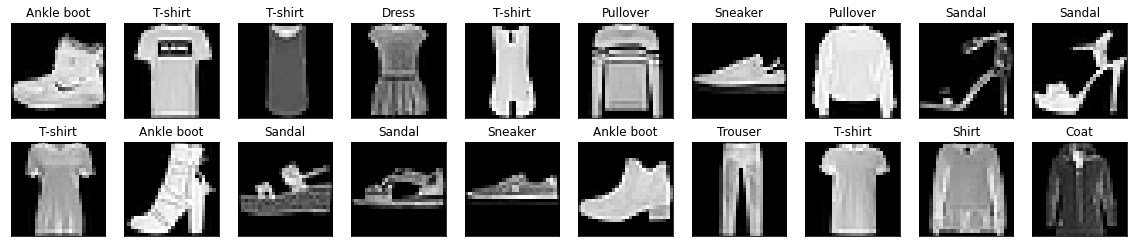

In [39]:
classes = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

x_train, y_train, _, _ = load_dataset()

fig = plt.figure(figsize = (20, 4))

for idx in range(20):
  plt.subplot(2, 10, idx + 1, xticks = [], yticks = [])
  plt.imshow(x_train[idx].reshape(28, 28), cmap = 'gray')
  plt.title(classes[y_train[idx].argmax()])

4. scale pixels

In [40]:
def prep_pixels(x_train, x_test):
  
  # convert from integers to floats
  x_train_norm = x_train.astype('float32')
  x_test_norm = x_test.astype('float32')

  # normalize to range 0-1
  x_train_norm = x_train_norm / 255
  x_test_norm = x_test_norm / 255

  # return normalized images
  return x_train_norm, x_test_norm

5. define CNN model

In [41]:
def define_model():
  
  model = Sequential()
  model.add(Conv2D(filters = 32, kernel_size = (3, 3), kernel_initializer = 'he_uniform', activation = 'relu', input_shape = (28, 28, 1)))
  model.add(MaxPooling2D(pool_size = (2, 2)))
  model.add(Flatten())
  model.add(Dense(units = 100, activation = 'relu', kernel_initializer = 'he_uniform'))
  model.add(Dense(units = 10, activation = 'softmax'))
  
  # compile model
  opt = SGD(learning_rate = 0.01, momentum = 0.9)
  model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])
  
  return model

6. run the test harness for evaluating a model

In [42]:
def run_test_harness():

  # load the dataset
  x_train, y_train, x_test, y_test = load_dataset()

  # prepare pixel data
  x_train, x_test = prep_pixels(x_train, x_test)

  #  define model
  model = define_model()

  # fit the model on training images
  model.fit(x_train, y_train, batch_size = 32, epochs = 10)

  # save the trained model for future use or deployment
  model.save('/content/drive/MyDrive/Deep Learning and Computer Vision/saved_models/cnn_fmnist.h5')

7. entry point, run the test harness

In [8]:
run_test_harness()

Epoch 1/10
1875/1875 [==============================] - 13s 3ms/step - loss: 0.4415 - accuracy: 0.8405
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2909 - accuracy: 0.8947
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2478 - accuracy: 0.9095
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2205 - accuracy: 0.9188
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2002 - accuracy: 0.9266
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1814 - accuracy: 0.9326
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1640 - accuracy: 0.9394
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1499 - accuracy: 0.9451
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1389 - accuracy: 0.9487
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.12

8. We can now load the final model and evaluate it on the test dataset.

In [55]:
# load the trained model
model = load_model('/content/drive/MyDrive/Deep Learning and Computer Vision/saved_models/cnn_fmnist.h5')

# load the test data
_, _, x_test, y_test = load_dataset()

# prepare pixel data
_, x_test = prep_pixels(x_train, x_test)

# evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)

print()
print('Accuracy of the model on the test dataset: ', round(accuracy, 4))
print('Loss of the model on the test dataset: ', round(loss, 4))

313/313 [==============================] - 1s 3ms/step - loss: 0.3121 - accuracy: 0.9009

Accuracy of the model on the test dataset:  0.9009
Loss of the model on the test dataset:  0.3121


9. make a single prediction

1/1 [==============================] - 0s 45ms/step
2


Text(0.5, 1.0, 'Pullover')

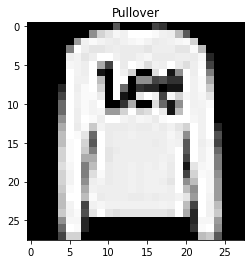

In [64]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model

# load the single image
img = load_img('/content/drive/MyDrive/Deep Learning and Computer Vision/images/cloth_sample_image.png', color_mode = 'grayscale', target_size = (28, 28))

# covert image into array
img = img_to_array(img)

# reshape image into (1, 28, 28, 1)
img = img.reshape(1, 28, 28, 1)

# prepare pixel data
img = img.astype('float32')
img = img / 255.0

# load the saved model
model = load_model('/content/drive/MyDrive/Deep Learning and Computer Vision/saved_models/cnn_fmnist.h5')

# predict the class
pred_class = model.predict(img)

# show predicted predicted class
print(pred_class.argmax())
plt.imshow(img.reshape(28, 28), cmap = 'gray')
plt.title(classes[pred_class.argmax()])